In [51]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [54]:
len(train_labels)

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
test_images.shape

(10000, 28, 28)

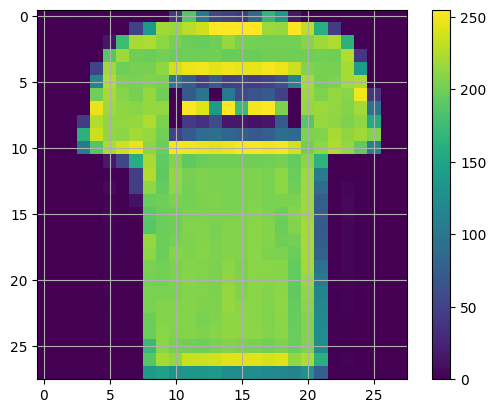

In [56]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()


In [57]:
train_images = train_images / 255.0

test_images = test_images / 255.0


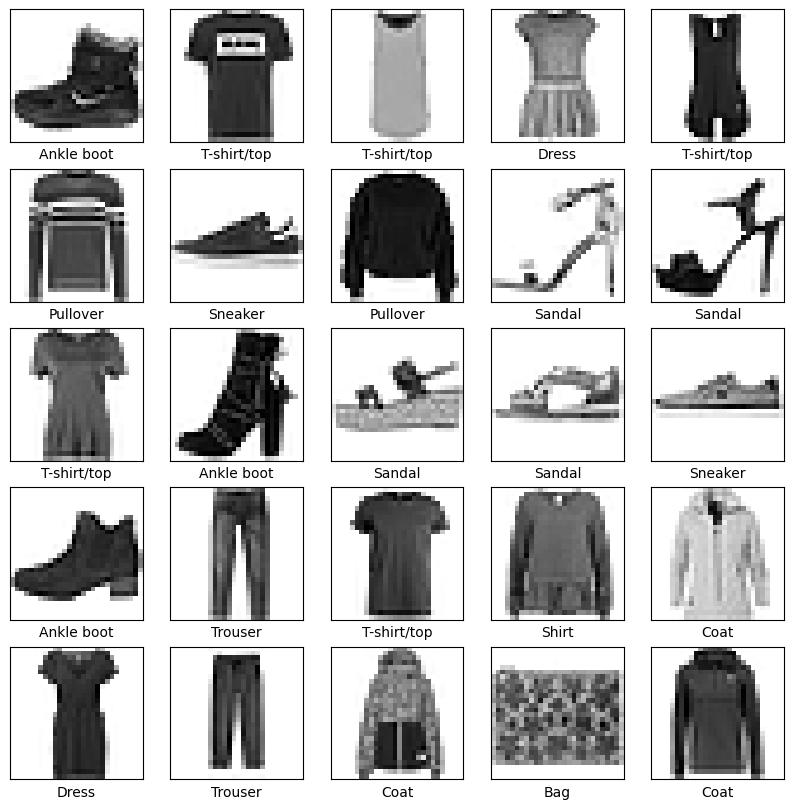

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [61]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4956 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3706 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3077 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2922 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2788 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2471 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [62]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3518 - accuracy: 0.8766 - 283ms/epoch - 905us/step

Test accuracy: 0.8766000270843506


In [63]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [64]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 707us/step


In [65]:
predictions[0]


array([2.2959408e-07, 2.9637506e-09, 3.5011968e-08, 5.2662426e-09,
       2.1793575e-07, 2.5095465e-03, 6.5762532e-07, 2.5664510e-03,
       6.0845230e-07, 9.9492222e-01], dtype=float32)

In [66]:
np.argmax(predictions[0])


9

In [67]:
test_labels[0]


9

In [68]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#B2B2B2")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


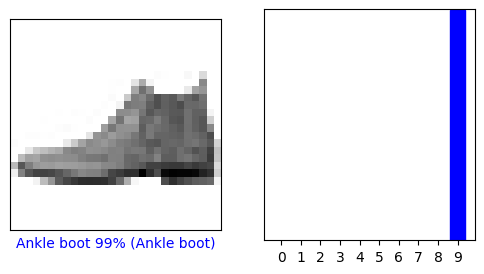

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


In [70]:
train_labels[7]

2

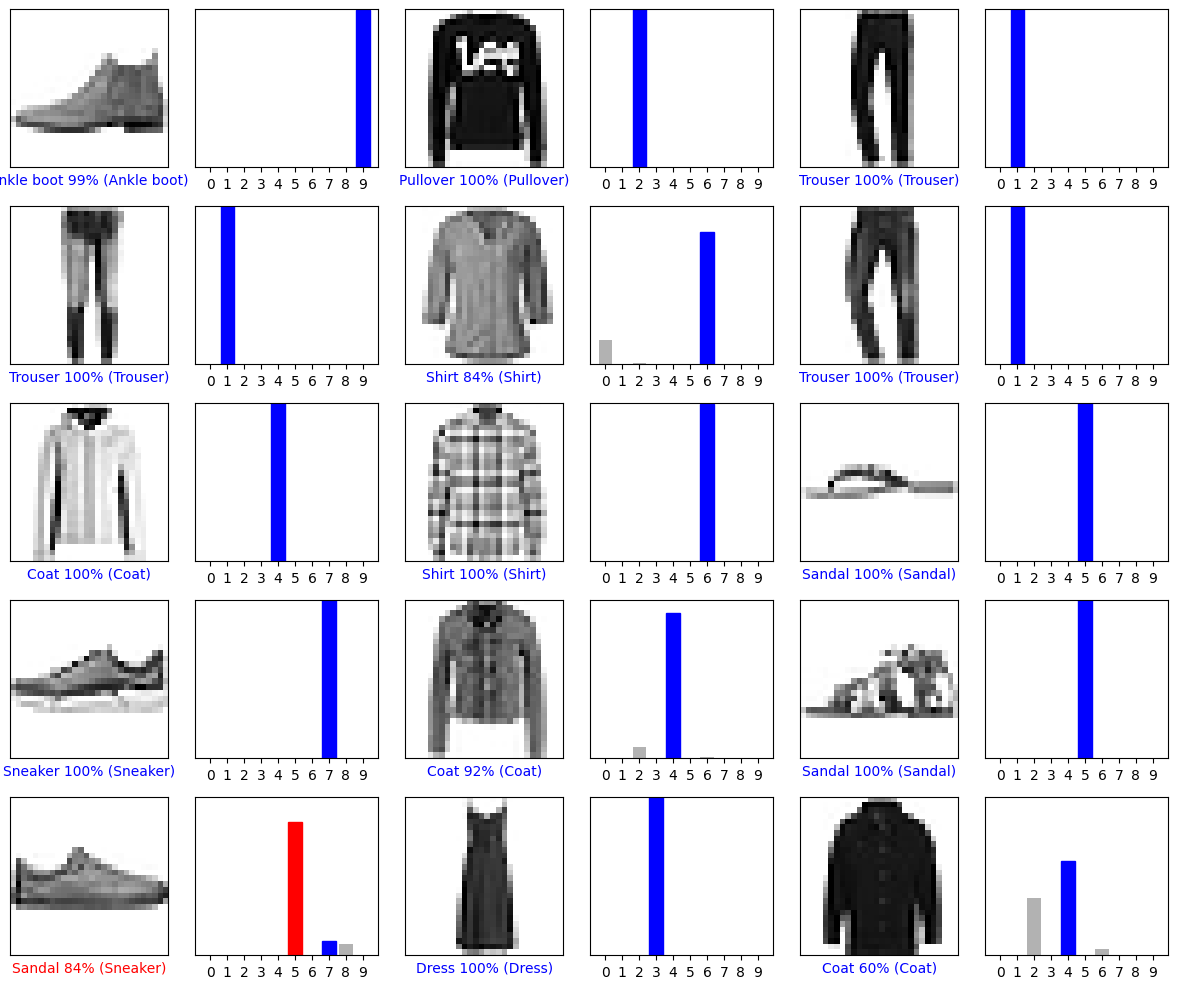

In [71]:
# Create plots to visualize first predictions from predicted values set.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Testing our model

In [72]:
# Grab an image from the test dataset.
img = test_images[94]

print(img.shape)


(28, 28)


In [73]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [74]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 17ms/step
[[2.11720739e-08 9.99997139e-01 5.67804137e-10 2.85866008e-06
  3.58660723e-09 5.30715554e-13 1.28296875e-08 1.84400851e-18
  1.06582243e-11 6.84905706e-16]]


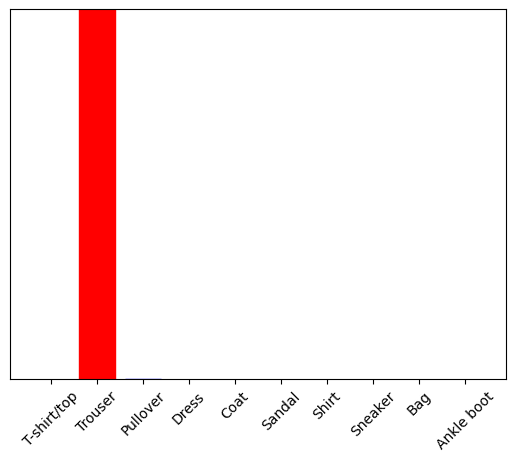

In [75]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [76]:
class_names[np.argmax(predictions_single[0])]


'Trouser'

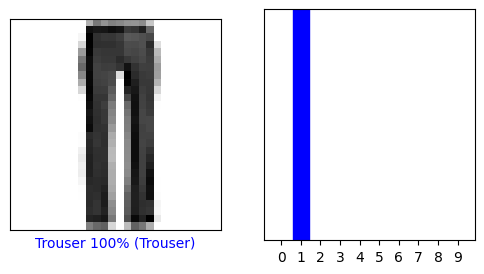

In [77]:
i = 94
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
